# The Sample Mean Revisited

I think statistics is taught wrongly at most universities. It is taught as if computers were never invented. Now that was fine 100 years ago. Even 20 years ago. But now computation is dirt cheap — and there is a better way to learn statistics — through Monte Carlo simulation.  For example, the sample mean is one of the first things you learn in a statistics class. You learn about the standard error of the sample mean and how it scales as \\(\sigma/\sqrt{N}.\\)

And you do some algebra and take it at face value.  But with Monte Carlo simulation you don’t have to take it at face value. You can simulate sampling, the sample mean, and see what distribution it has.  That’s what the following Python code does. 

It’s very straight forward. I assume that I take Ns independent samples from a zero-mean, unit variance Gaussian distribution. I then compute the sample mean: \\(\sum x_i/N_s .\\)

I do this 30,000 times for three different Ns: \\(N_s = 2, 4, 16.\\)

The histograms of the sample means are plotted below.  As expected, the variance of the sample mean is less when you have more samples.  The distribution is narrower around the true mean (zero in this case).  The theoretical sampling distribution, with mean zero and \\( standard\ deviation = standard\ error = \sigma/\sqrt{N}.\\) is plotted as well.  

Writing this code yourself and seeing the distributions match the theory goes way further than doing any sort of algebraic manipulation to make statistics real in my mind. 


<!-- TEASER_END -->

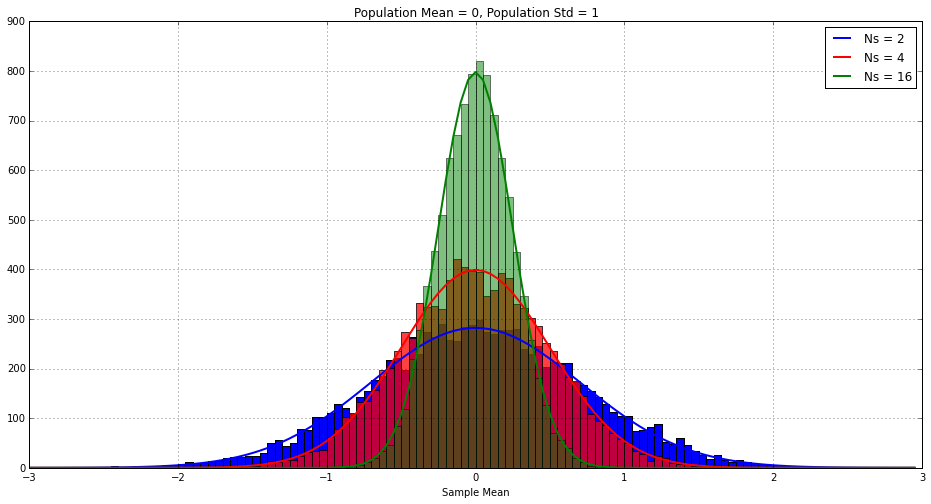

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
 
#=======================================================
#Parameters
#=======================================================
#Population Params
mu = 0
sig = 1
 
#Sample Parameters
numSamplesVec = [2, 4, 16]
colorVec = ['blue', 'red', 'green']
alphaVec = [1.0, .75, .5]
 
#Monte Carlo Params
Nmc = 10000
 
#=======================================================
#Monte Carlo Simulation
#=======================================================
plt.close('all')
plt.figure(figsize=(16,8))
bins = np.arange(-3,3, .05) #<-- histogram bins
 
for Ns, col, alp in zip(numSamplesVec, colorVec, alphaVec):
 
    #Initialize vectors for all the parameters of interest
    sampleStd = sig/np.sqrt(Ns)
    muSample = np.zeros(Nmc)
    sigSample = np.zeros(Nmc)
    stdErr = np.zeros(Nmc)
    tStat = np.zeros(Nmc)
 
    #Monte Carlo sim of many samples with size Ns
    for k in range(0,Nmc):
        x = sig*np.random.randn(Ns)+mu
        muSample[k] = np.mean(x)
        sigSample[k] = np.std(x)
        stdErr[k] = sigSample[k]/np.sqrt(Ns)
        tStat[k] = muSample[k]/stdErr[k] #<-- t-test for 0-mean. Is the mean significantly different 0?
 
    #Histogram and plotting of sample mean
    n,muBins, p = plt.hist(muSample, bins, color=col, alpha=alp )
    dmu = muBins[1]-muBins[0]
    y = mlab.normpdf(muBins, mu, sampleStd)
    plt.plot(muBins, dmu*Nmc*y, color=col,linewidth=2)
 
#Finishing up the plot with legend and labels
plt.grid('on')
plt.xlabel('Sample Mean')
legendList = list()
for Ns in numSamplesVec:
    legendList.append('Ns = ' + str(Ns))
plt.legend(legendList)
plt.title('Population Mean = 0, Population Std = 1')